# #Quarentenadados Alura + Data Hackers

Um pequeno curso de Ciência de Dados para quem está começando. 
É a #QuarentenaDados, gratuita, com inscrições até domingo! Com apoio da Alura Cursos Online, 
Caelum e DataHackers. Indique para seus colegas! https://lnkd.in/dEcZ328

Desafios dia 03

In [4]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Lendo arquivo csv
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


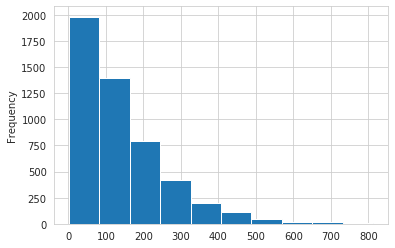

In [5]:
#Avaliando o número de reviews
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist')

In [6]:
#Tratando a coluna colors do dataframe
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/home/jvitor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    4815
0     209
Name: color_0_ou_1, dtype: int64

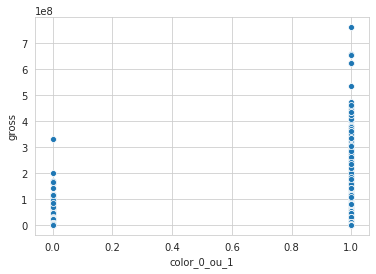

In [7]:
#Plot um gráfico que demonstre a correlação entre cor de filme e seu orçamento
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

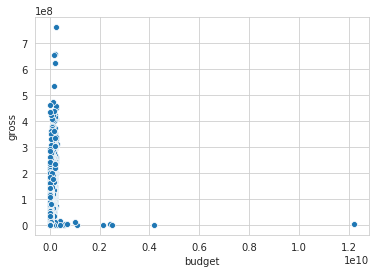

In [8]:
#Investigação entre orçamento e faturamento
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

In [9]:
#Análise dos filmes produzidos apenas nos EUA
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


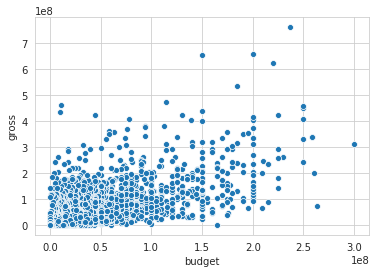

In [10]:
#Investigação entre orçamento e faturamento apenas nos EUA
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

/home/jvitor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


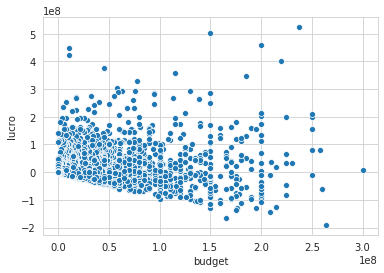

In [11]:
#Criação da coluna Lucro = gross - budget
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

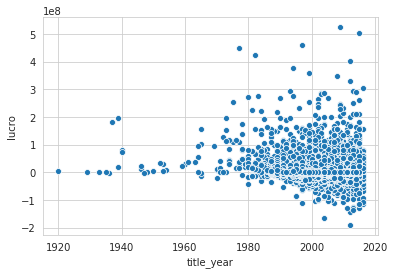

In [12]:
#Verificando a relação de lucro com o ano de lançamento do filme
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

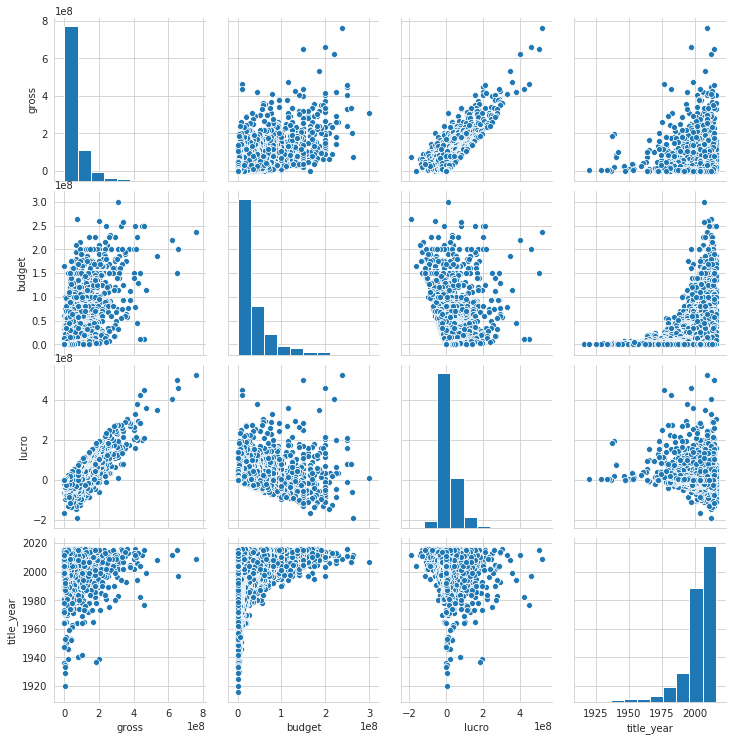

In [13]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

In [14]:
#Correlação entre as colunas
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


In [61]:
#Análise dos orçamentos de filmes a partir de seus diretores
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


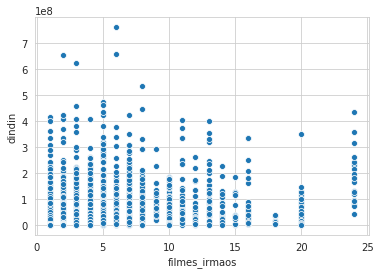

In [62]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

# Desafio 1 do Thiago Gonçalves
Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

sns.boxplot(x='color', y='imdb_score', data=color_or_bw)

# Desafio 2 do Guilherme Silveira
No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [20]:
#Ordena a tabela pela coluna lucro e pega o de menor valor
imdb_usa.sort_values('lucro').head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


# Desafio 3 do Guilherme Silveira
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [51]:
#Primeiro: Separar apenas as colunas de nosso interesse (lucro e ano)
df = imdb_usa[['title_year','lucro']]
df.head()

,title_year,lucro
0,2009.0,523505847.0
1,2007.0,9404152.0
3,2012.0,198130642.0
5,2012.0,-190641321.0
6,2007.0,78530303.0


In [52]:
#Agora, vamos separar os filmes com a data de lançamento mais recente
df = df.query('title_year>2013')
df.dropna(inplace=True)
df.head(10)

,title_year,lucro
8,2015.0,208991599.0
10,2016.0,80249062.0
27,2016.0,157197282.0
29,2015.0,502177271.0
37,2014.0,35428137.0
39,2014.0,2853933.0
45,2015.0,160034110.0
47,2014.0,33914986.0
57,2016.0,-54531374.0
62,2015.0,-128624673.0


In [53]:
#Analizando a média de lucro entre esses filmes...
df['lucro'].mean()

18809197.734265734

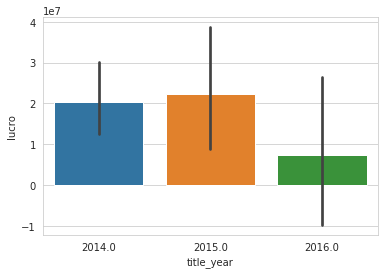

In [57]:
sns.barplot(x="title_year", y="lucro", data=df)

# Desafio 4 do Paulo Silveira
Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [59]:
#Separa os filme anteriores a 1939, ordena pela coluna lucro e pega os maiores 
psg = imdb_usa.query('title_year < 1940').sort_values('lucro', ascending=False).dropna()
psg[['movie_title', 'lucro']].head()

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0
4157,The Wizard of Oz,19402612.0
4812,The Broadway Melody,2429000.0
4706,Top Hat,2391000.0


# Desafio 5 do Paulo Silveira
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [63]:
gross_director[(gross_director['filmes_irmaos'] > 16) & (gross_director['filmes_irmaos'] < 20)]

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


# Desafio 6 do Thiago Gonçalves
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

# Desafio 7 do Thiago Gonçalves
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [65]:
filmes_2k = imdb_usa.query('title_year >= 2000')
filmes_2k[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


# Desafio 8 do Allan Spadini
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

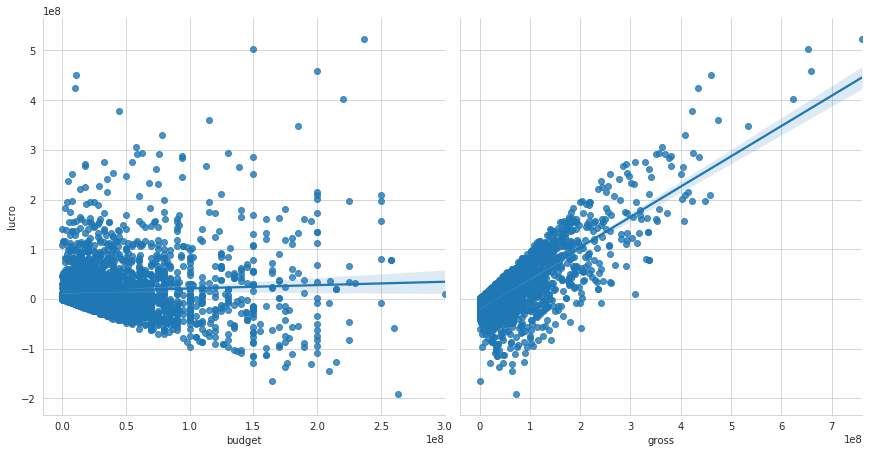

In [66]:
#Mesmos gráficos, porém adicionado uma regressão linear a partir dos dados
sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')

# Desafio 9 da Thais André
Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [67]:
imdb.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.257529,0.181246,0.265591,0.189533,0.477603,0.624255,0.260753,-0.035380,0.608175,0.119237,0.276845,0.280421,0.307226,-0.050243,0.681723
duration,0.257529,1.000000,0.173027,0.119806,0.087567,0.247443,0.313935,0.120975,0.014060,0.328413,0.073586,-0.137076,0.129660,0.262618,-0.090680,0.194401
director_facebook_likes,0.181246,0.173027,1.000000,0.123204,0.091374,0.146368,0.299873,0.120781,-0.040732,0.223519,0.021015,-0.064856,0.121191,0.171564,0.001390,0.162588
actor_3_facebook_likes,0.265591,0.119806,0.123204,1.000000,0.250000,0.289965,0.277918,0.470036,0.098381,0.225871,0.045718,0.095383,0.556366,0.051683,-0.003095,0.267775
actor_1_facebook_likes,0.189533,0.087567,0.091374,0.250000,1.000000,0.153083,0.191239,0.952760,0.070709,0.144768,0.022202,0.086286,0.389749,0.075952,-0.020262,0.133604
gross,0.477603,0.247443,0.146368,0.289965,0.153083,1.000000,0.635271,0.240049,-0.030124,0.561006,0.101033,0.029110,0.254172,0.198417,0.071362,0.370140
num_voted_users,0.624255,0.313935,0.299873,0.277918,0.191239,0.635271,1.000000,0.261063,-0.029861,0.798691,0.079069,0.007232,0.265317,0.411299,-0.014510,0.535218
cast_total_facebook_likes,0.260753,0.120975,0.120781,0.470036,0.952760,0.240049,0.261063,1.000000,0.089370,0.204547,0.035525,0.109263,0.625837,0.085091,-0.017977,0.204378
facenumber_in_poster,-0.035380,0.014060,-0.040732,0.098381,0.070709,-0.030124,-0.029861,0.089370,1.000000,-0.070540,-0.019893,0.061065,0.069052,-0.064403,0.013928,0.006502
num_user_for_reviews,0.608175,0.328413,0.223519,0.225871,0.144768,0.561006,0.798691,0.204547,-0.070540,1.000000,0.084149,-0.002355,0.217153,0.292745,-0.024867,0.398795
